In [ ]:
### APoE
### Generating missingness in APoE column, imputatation and classification of the imputed dataset

In [16]:
# Creating a copy of the original dataframe
df_apoe_m40 = df_actual.copy()
df_apoe_m40.head()

,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,...,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_Q10SCORE,adas_Q11SCORE,adas_Q12SCORE,adas_Q13SCORE,MOTHDEM,CDR,APOE
0,0.745525,0.794748,0.491765,0.687288,0.354272,0.053029,0.393061,1.000000,0.477280,0.619156,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
1,0.592240,0.665080,0.290817,0.503438,0.297870,0.041430,0.545423,0.478379,0.546091,0.398004,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
2,0.458426,0.530987,0.383385,0.658083,0.419540,0.068931,0.320838,0.414968,0.417480,0.398636,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
3,0.563800,0.587889,0.369088,0.651455,0.384590,0.048233,0.368835,0.615725,0.418360,0.480851,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
4,0.624248,0.664183,0.276727,0.661635,0.520853,0.120530,0.544304,0.180479,0.476558,0.290435,...,1.0,0.750000,1.0,1.0,1.0,1.0,0.8,0,0.0,0


In [17]:
import numpy as np
# Set random seed for reproducibility
seed = 89
np.random.seed(seed)

# Define a function to introduce missingness in 'APoE' column based on 'CDR'
def introduce_missingness(df_apoe_m40):
    # Define the probability of missingness
    p_missing = 0.4

    # Generate a boolean mask to identify rows where 'CDR' has values 0.5 or 1
    mask = (df_apoe_m40['CDR'] == 0.5) | (df_apoe_m40['CDR'] == 1)

    # Randomly select rows based on the mask and introduce missingness in 'APoE'
    missing_indices = df_apoe_m40[mask].sample(frac=p_missing).index
    df_apoe_m40.loc[missing_indices, 'APOE'] = np.nan

    return df_apoe_m40

  # Call the function to introduce missingness
df_apoe_missingness = introduce_missingness(df_apoe_m40)

In [ ]:
df_apoe_missingness.tail()

,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,...,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_Q10SCORE,adas_Q11SCORE,adas_Q12SCORE,adas_Q13SCORE,MOTHDEM,CDR,APOE
554,0.102050,0.000000,0.000000,0.379090,0.115710,0.014856,0.152403,0.095275,0.018378,0.311250,...,0.2,0.000000,1.00,1.0,1.000000,1.0,0.0,1,1.0,2.0
555,0.693037,0.668451,0.356448,0.566407,0.445647,0.057959,0.304343,0.132452,0.246746,0.142295,...,1.0,0.416667,1.00,1.0,1.000000,1.0,0.6,0,0.5,0.0
556,0.600632,0.715813,0.277625,0.483890,0.390352,0.058854,0.482336,0.362199,0.698153,0.252722,...,0.8,0.666667,1.00,1.0,1.000000,1.0,0.6,0,0.5,0.0
557,0.842654,0.786929,0.188005,0.571366,0.315403,0.042039,0.251464,0.139725,0.234703,0.082283,...,1.0,0.416667,0.75,0.5,0.666667,0.5,0.6,0,0.5,NaN
558,0.548794,0.615394,0.138131,0.454855,0.208531,0.034581,0.024287,0.199837,0.290168,0.081695,...,1.0,0.666667,1.00,1.0,1.000000,1.0,0.8,1,0.0,0.0


In [18]:
# Imputation of 40% missingness in the 'APoE' column

import tensorflow as tf

# Replace missing values with a placeholder value (-1 or NaN)
df_40MA_filled = df_apoe_missingness .fillna(-1)  # Replace NaN values with -1

# Define the architecture of the denoising autoencoder with dropout
input_dim = len(df_40MA_filled.columns)  # Input dimension
hidden_dim1 = 126  # Hidden layer dimension for the first hidden layer
hidden_dim2 = 63  # Hidden layer dimension for the second hidden laye

# Define the autoencoder architecture with dropout regularization
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.GaussianNoise(0.1),  # Add Gaussian noise with standard deviation 0.1
    tf.keras.layers.Dense(hidden_dim1, activation='relu'),
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the first hidden layer
    tf.keras.layers.Dense(hidden_dim2, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the second hidden layer
    tf.keras.layers.Dense(input_dim, activation='relu')
])

# Compile the autoencoder with appropriate loss function
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(df_40MA_filled, df_40MA_filled, epochs=50, batch_size=50, validation_split=0.2)

# Use the trained autoencoder to predict and impute missing values
imputed_data = autoencoder.predict(df_40MA_filled)
# Create a DataFrame with imputed data and original column names
df_imputed_40 = pd.DataFrame(imputed_data, columns=df_40MA_filled.columns)
# Convert continuous predictions to integer values
imputed_data_integer = np.round(imputed_data)

# Replace missing values in the original DataFrame with imputed values
df_imputed_40 = df_apoe_missingness.copy()  # Create a copy of the original DataFrame
df_imputed_40['APOE'] = np.where(df_imputed_40['APOE'].isnull(), imputed_data_integer[:, df_imputed_40.columns.get_loc('APOE')], df_imputed_40['APOE'])

Epoch 1/50
9/9 [==============================] - 2s 37ms/step - loss: 0.1090 - val_loss: 0.0880
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0851 - val_loss: 0.0672
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0661 - val_loss: 0.0511
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0507 - val_loss: 0.0374
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0399 - val_loss: 0.0305
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0348 - val_loss: 0.0276
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0320 - val_loss: 0.0273
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0303 - val_loss: 0.0245
Epoch 9/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0276 - val_loss: 0.0235
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0267 - val_loss: 0.0221
Epoch 11/50
9/9 [============

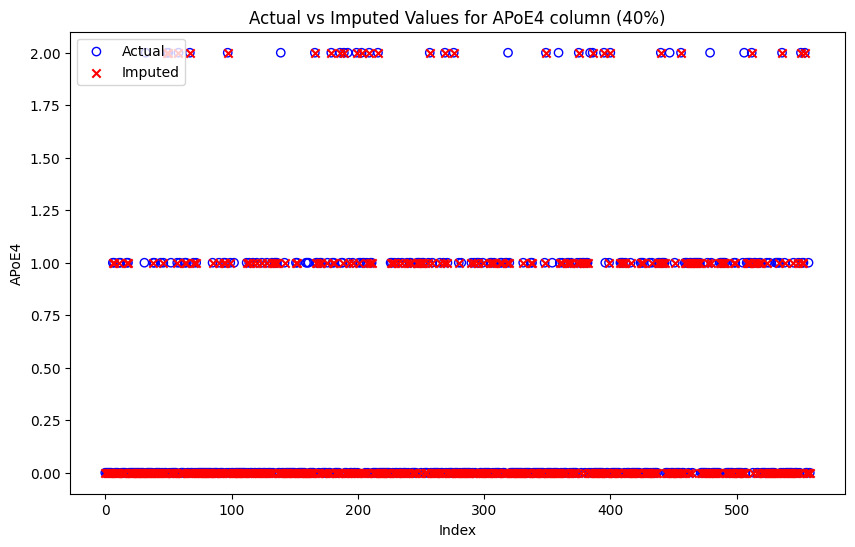

In [21]:
# Visualising the actual values and imputed values of the 'APOE' column

import matplotlib.pyplot as plt

# Extract actual and imputed values
actual_values = df_actual['APOE']
imputed_values = df_imputed_40['APOE']

# Create an array of indices from 0 to the length of the DataFrame
indices = range(len(actual_values))

# Plot the actual values and imputed values as scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(indices, actual_values, label='Actual', marker='o', facecolors='none', edgecolors='blue')
plt.scatter(indices, imputed_values, label='Imputed', marker='x', color='red')
plt.title('Actual vs Imputed Values for APoE4 column (40%)')  # Set y-axis limits to match the range of the actual values
plt.xlabel('Index')
plt.ylabel('APoE4')
plt.legend()
plt.show()

In [ ]:
# Calculating RMSE to evaluate the performance of imputation on missing values by the autoencoder.
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract actual and imputed values
actual_values = df_actual['APOE'] # contains the actual values of 'APOE'
imputed_values = df_imputed_40['APOE'] # contains the imputed values of 'APOE'

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, imputed_values))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.33571007169302497


In [ ]:
# Calculation of accuracy of the performed imputation.
# Compute the number of correctly imputed values.
correct_imputations = (df_actual['APOE'] == df_imputed_40['APOE']).sum()

# Compute the total number of imputed values
total_imputations = len(df_imputed_40['APOE'])

# Compute the accuracy of the imputation
accuracy = correct_imputations / total_imputations

print("Imputation Accuracy:", accuracy)


Imputation Accuracy: 0.9355992844364938


In [ ]:
# Get the weights of the first dense layer (connecting input to hidden layer)
weights = autoencoder.layers[1].get_weights()[0]

# Calculate the importance of each feature by taking the absolute sum of weights across all hidden units
feature_importance = np.sum(np.abs(weights), axis=1)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': df_imputed_40.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top most important features
print(feature_importance_df.head())

                       Feature  Importance
176                   PTGENDER    9.788119
217                    MOTHDEM    9.284788
161           wm.rh.precentral    9.012368
151  wm.rh.medialorbitofrontal    8.946236
90   ctx.rh.posteriorcingulate    8.945329


In [ ]:
### Classification using Random Forest Classifier
### Balancing by SMOTE
### Evaluation using K Fold Cross Validation

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt


# Split the dataset into features (X) and target variable (y)
X = df_imputed_40.drop(columns=['AD_LABEL'])  # Features
y = df_imputed_40['AD_LABEL']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=40)

# Apply SMOTE only to the training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=40)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

# Train the classifier on the resampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Cross-Validation Scores: [0.93181818 0.90909091 0.875      0.95454545 0.97727273 0.96590909
 0.98850575 0.96551724 0.95402299 0.95402299]
Mean CV Score: 0.9475705329153605
Std CV Score: 0.03216133909921382
Accuracy: 0.8303571428571429
Precision: 0.8313392857142857
Recall: 0.8303571428571429
F1-score: 0.830242673992674

Confusion Matrix:
[[66  4  1]
 [ 5 17  5]
 [ 0  4 10]]

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        71
           2       0.68      0.63      0.65        27
           3       0.62      0.71      0.67        14

    accuracy                           0.83       112
   macro avg       0.74      0.76      0.75       112
weighted avg       0.83      0.83      0.83       112



In [ ]:
# The accuracy obtained is 83%, indicating that 83% of the test instances were correctly classified
# For class 3, representing AD:
# Precision (0.62): Among the instances predicted as AD, 62% were correctly classified as AD, while the remaining 38% were incorrectly classified as non-AD.
# Recall (0.71): Out of all actual instances of AD, the model correctly identified 71% of them as AD, while the remaining 29% were incorrectly classified as non-AD.
# F1-score (0.67): The harmonic mean of precision and recall, providing a balanced measure of the classifier's performance, is 67%.
# These metrics suggest that while the model has a moderate precision rate for AD (62%), indicating a relatively low rate of false positives, the recall rate (71%) suggests that there is room for improvement in correctly identifying true positives for AD while minimizing false negatives.

In [ ]:
### 50% Missingness generation in the APOE column

In [22]:
# Creating a copy of the original dataframe
df_apoe_m50 = df_actual.copy()
df_apoe_m50.head()


,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,...,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_Q10SCORE,adas_Q11SCORE,adas_Q12SCORE,adas_Q13SCORE,MOTHDEM,CDR,APOE
0,0.745525,0.794748,0.491765,0.687288,0.354272,0.053029,0.393061,1.000000,0.477280,0.619156,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
1,0.592240,0.665080,0.290817,0.503438,0.297870,0.041430,0.545423,0.478379,0.546091,0.398004,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
2,0.458426,0.530987,0.383385,0.658083,0.419540,0.068931,0.320838,0.414968,0.417480,0.398636,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
3,0.563800,0.587889,0.369088,0.651455,0.384590,0.048233,0.368835,0.615725,0.418360,0.480851,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
4,0.624248,0.664183,0.276727,0.661635,0.520853,0.120530,0.544304,0.180479,0.476558,0.290435,...,1.0,0.750000,1.0,1.0,1.0,1.0,0.8,0,0.0,0


In [24]:
import numpy as np
# Set random seed for reproducibility
seed = 89
np.random.seed(seed)

# Define a function to introduce missingness in 'APoE' based on 'CDR'
def introduce_missingness(df_apoe_m50):
    # Define the probability of missingness
    p_missing = 0.5

    # Generate a boolean mask to identify rows where 'CDR' has values 0.5 or 1
    mask = (df_apoe_m50['CDR'] == 0.5) | (df_apoe_m50['CDR'] == 1)

    # Randomly select rows based on the mask and introduce missingness in 'APoE'
    missing_indices = df_apoe_m50[mask].sample(frac=p_missing).index
    df_apoe_m50.loc[missing_indices, 'APOE'] = np.nan

    return df_apoe_m50

  # Call the function to introduce missingness
df_apoe_mis50 = introduce_missingness(df_apoe_m50)



In [25]:
# Imputation of 50% missingness in the 'APOE' column

import tensorflow as tf

# Replace missing values with a placeholder value (-1 or NaN)
df_50MA_filled = df_apoe_mis50 .fillna(-1)  # Replace NaN values with -1

# Define the architecture of the denoising autoencoder with dropout
input_dim = len(df_50MA_filled.columns)  # Input dimension
hidden_dim1 = 126  # Hidden layer dimension for the first hidden layer
hidden_dim2 = 63  # Hidden layer dimension for the second hidden laye

# Define the autoencoder architecture with dropout regularization
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.GaussianNoise(0.1),  # Add Gaussian noise with standard deviation 0.1
    tf.keras.layers.Dense(hidden_dim1, activation='relu'),
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the first hidden layer
    tf.keras.layers.Dense(hidden_dim2, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the second hidden layer
    tf.keras.layers.Dense(input_dim, activation='relu')
])
# Compile the autoencoder with appropriate loss function
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(df_50MA_filled, df_50MA_filled, epochs=50, batch_size=50, validation_split=0.2)

# Use the trained autoencoder to predict and impute missing values
imputed_data = autoencoder.predict(df_50MA_filled)
# Create a DataFrame with imputed data and original column names
df_imputed_50 = pd.DataFrame(imputed_data, columns=df_50MA_filled.columns)
# Convert continuous predictions to integer values
imputed_data_integer = np.round(imputed_data)

# Replace missing values in the original DataFrame with imputed values
df_imputed_50 = df_apoe_mis50.copy()  # Create a copy of the original DataFrame
df_imputed_50['APOE'] = np.where(df_imputed_50['APOE'].isnull(), imputed_data_integer[:, df_imputed_50.columns.get_loc('APOE')], df_imputed_50['APOE'])


Epoch 1/50
9/9 [==============================] - 1s 28ms/step - loss: 0.1053 - val_loss: 0.0841
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0813 - val_loss: 0.0643
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0658 - val_loss: 0.0528
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0550 - val_loss: 0.0434
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0471 - val_loss: 0.0375
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0422 - val_loss: 0.0332
Epoch 7/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0379 - val_loss: 0.0301
Epoch 8/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0338 - val_loss: 0.0264
Epoch 9/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0305 - val_loss: 0.0240
Epoch 10/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0282 - val_loss: 0.0231
Epoch 11/50
9/9 [===================

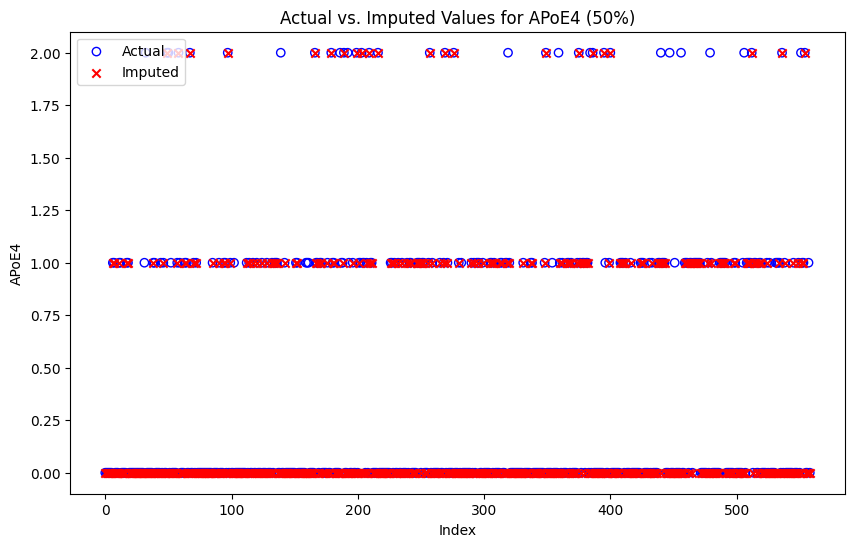

In [26]:
# Visualising the actual values and imputed values of the 'APoE' column

import matplotlib.pyplot as plt

# Extract actual and imputed values
actual_values = df_actual['APOE']
imputed_values = df_imputed_50['APOE']

# Create an array of indices from 0 to the length of the DataFrame
indices = range(len(actual_values))

# Plot the actual values and imputed values as scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(indices, actual_values, label='Actual', marker='o', facecolors='none', edgecolors='blue')
plt.scatter(indices, imputed_values, label='Imputed', marker='x', color='red')
plt.xlabel('Index')
plt.ylabel('APoE4')
plt.title('Actual vs. Imputed Values for APoE4 (50%)')  # Set y-axis limits to match the range of the actual values
plt.legend()
plt.show()


In [ ]:
# Calculating RMSE to evaluate the performance of imputation on missing values by the autoencoder.
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract actual and imputed values
actual_values = df_actual['APOE'] # contains the actual values of 'APOE'
imputed_values = df_imputed_50['APOE'] # contains the imputed values of 'APOE'

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, imputed_values))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.38994518214808205


In [ ]:
# Calculation of accuracy of the performed imputation.
# Compute the number of correctly imputed values.
correct_imputations = (df_actual['APOE'] == df_imputed_50['APOE']).sum()

# Compute the total number of imputed values
total_imputations = len(df_imputed_50['APOE'])

# Compute the accuracy of the imputation
accuracy = correct_imputations / total_imputations

print("Imputation Accuracy:", accuracy)


Imputation Accuracy: 0.9230769230769231


In [ ]:
# Get the weights of the first dense layer (connecting input to hidden layer)
weights = autoencoder.layers[1].get_weights()[0]

# Calculate the importance of each feature by taking the absolute sum of weights across all hidden units
feature_importance = np.sum(np.abs(weights), axis=1)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature':df_imputed_50.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top most important features
print(feature_importance_df.head())



                  Feature  Importance
190               FATHDEM   10.183906
219                  APOE   10.173292
217               MOTHDEM   10.131652
176              PTGENDER    9.874562
141  wm.rh.corpuscallosum    9.359887


In [ ]:
### Classification using Random Forest Classifier
### Balancing by SMOTE
### Evaluation using K Fold Cross Validation

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt



# Split the dataset into features (X) and target variable (y)
X = df_imputed_50.drop(columns=['AD_LABEL'])  # Features
y = df_imputed_50['AD_LABEL']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=40)

# Apply SMOTE only to the training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=40)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

# Train the classifier on the resampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.90909091 0.93181818 0.93181818 0.94318182 0.97727273 0.97727273
 0.98850575 0.95402299 0.97701149 0.98850575]
Mean CV Score: 0.957850052246604
Std CV Score: 0.026388934862872044
Accuracy: 0.8035714285714286
Precision: 0.7984599233529027
Recall: 0.8035714285714286
F1-score: 0.8003102462249269

Confusion Matrix:
[[65  5  1]
 [ 8 15  4]
 [ 0  4 10]]

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.92      0.90        71
           2       0.62      0.56      0.59        27
           3       0.67      0.71      0.69        14

    accuracy                           0.80       112
   macro avg       0.73      0.73      0.73       112
weighted avg       0.80      0.80      0.80       112



In [ ]:
# The accuracy obtained is 50% missingness in 'APOE' and imputed values is approximately 80%, indicating 80% of the test instances were correctly classified.
# For class 3, representing AD:
# Precision (0.67): Among the instances predicted as AD, 67% were correctly classified as AD, while the remaining 33% were incorrectly classified as non-AD.
# Recall (0.71): Out of all actual instances of AD, the model correctly identified 71% of them as AD, while the remaining 29% were incorrectly classified as non-AD.
# F1-score (0.69): The harmonic mean of precision and recall, providing a balanced measure of the classifier's performance, is 69%.

In [ ]:
### 60% Missingness generation in the APoE column

In [12]:
# Creating a copy of the original dataframe
df_apoe_m60 = df_actual.copy()
df_apoe_m60.head()


,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,...,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_Q10SCORE,adas_Q11SCORE,adas_Q12SCORE,adas_Q13SCORE,MOTHDEM,CDR,APOE
0,0.745525,0.794748,0.491765,0.687288,0.354272,0.053029,0.393061,1.000000,0.477280,0.619156,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
1,0.592240,0.665080,0.290817,0.503438,0.297870,0.041430,0.545423,0.478379,0.546091,0.398004,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
2,0.458426,0.530987,0.383385,0.658083,0.419540,0.068931,0.320838,0.414968,0.417480,0.398636,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
3,0.563800,0.587889,0.369088,0.651455,0.384590,0.048233,0.368835,0.615725,0.418360,0.480851,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
4,0.624248,0.664183,0.276727,0.661635,0.520853,0.120530,0.544304,0.180479,0.476558,0.290435,...,1.0,0.750000,1.0,1.0,1.0,1.0,0.8,0,0.0,0


In [13]:
import numpy as np
# Set random seed for reproducibility
seed = 89
np.random.seed(seed)

# Define a function to introduce missingness in 'APoE' based on 'CDR'
def introduce_missingness(df_apoe_m60):
    # Define the probability of missingness
    p_missing = 0.6

    # Generate a boolean mask to identify rows where 'CDR' has values 0.5 or 1
    mask = (df_apoe_m60['CDR'] == 0.5) | (df_apoe_m60['CDR'] == 1)

    # Randomly select rows based on the mask and introduce missingness in 'APoE'
    missing_indices = df_apoe_m60[mask].sample(frac=p_missing).index
    df_apoe_m60.loc[missing_indices, 'APOE'] = np.nan

    return df_apoe_m60

  # Call the function to introduce missingness
df_apoe_mis_60 = introduce_missingness(df_apoe_m60)



In [14]:
# Imputation of 60% missingness in the 'APoE' column

import tensorflow as tf

# Replace missing values with a placeholder value (-1)
df_60MA_filled = df_apoe_mis_60 .fillna(-1)  # Replace NaN values with -1

# Define the architecture of the denoising autoencoder
input_dim = len(df_60MA_filled.columns)  # Input dimension
hidden_dim1 = 126  # Hidden layer dimension for the first hidden layer
hidden_dim2 = 63  # Hidden layer dimension for the second hidden laye

# Define the autoencoder architecture with dropout regularization
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.GaussianNoise(0.1),  # Add Gaussian noise with standard deviation 0.1
    tf.keras.layers.Dense(hidden_dim1, activation='relu'),
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the first hidden layer
    tf.keras.layers.Dense(hidden_dim2, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the second hidden layer
    tf.keras.layers.Dense(input_dim, activation='relu')
])
# Compile the autoencoder with appropriate loss function
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(df_60MA_filled, df_60MA_filled, epochs=50, batch_size=50, validation_split=0.2)

# Use the trained autoencoder to predict and impute missing values
imputed_data = autoencoder.predict(df_60MA_filled)
# Create a DataFrame with imputed data and original column names
df_imputed_60 = pd.DataFrame(imputed_data, columns=df_60MA_filled.columns)
# Convert continuous predictions to integer values
imputed_data_integer = np.round(imputed_data)

# Replace missing values in the original DataFrame with imputed values
df_imputed_60 = df_apoe_mis_60.copy()  # Create a copy of the original DataFrame
df_imputed_60['APOE'] = np.where(df_imputed_60['APOE'].isnull(), imputed_data_integer[:, df_imputed_60.columns.get_loc('APOE')], df_imputed_60['APOE'])


Epoch 1/50
9/9 [==============================] - 2s 54ms/step - loss: 0.1058 - val_loss: 0.0814
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0805 - val_loss: 0.0626
Epoch 3/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0646 - val_loss: 0.0498
Epoch 4/50
9/9 [==============================] - 0s 46ms/step - loss: 0.0543 - val_loss: 0.0409
Epoch 5/50
9/9 [==============================] - 0s 31ms/step - loss: 0.0467 - val_loss: 0.0366
Epoch 6/50
9/9 [==============================] - 0s 47ms/step - loss: 0.0411 - val_loss: 0.0323
Epoch 7/50
9/9 [==============================] - 0s 31ms/step - loss: 0.0365 - val_loss: 0.0274
Epoch 8/50
9/9 [==============================] - 0s 28ms/step - loss: 0.0330 - val_loss: 0.0244
Epoch 9/50
9/9 [==============================] - 0s 32ms/step - loss: 0.0289 - val_loss: 0.0227
Epoch 10/50
9/9 [==============================] - 0s 29ms/step - loss: 0.0271 - val_loss: 0.0212
Epoch 11/50
9/9 [============

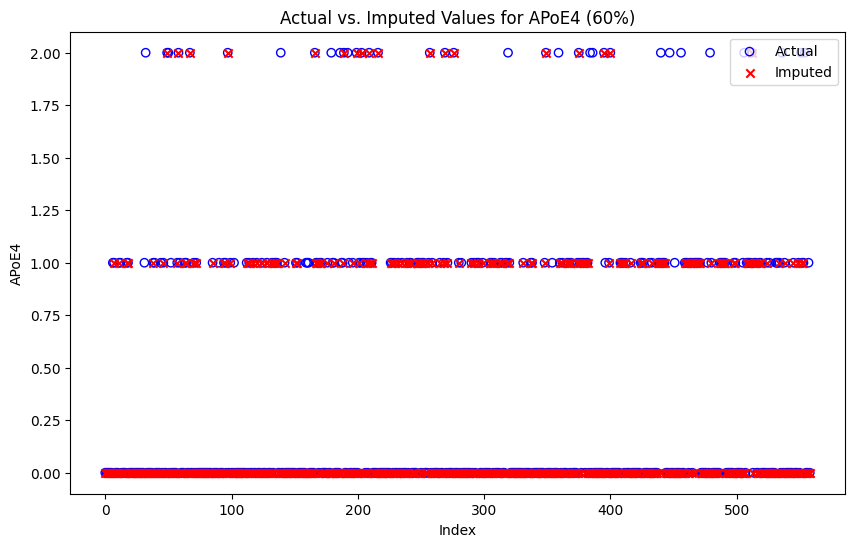

In [15]:
# Visualising the actual values and imputed values of the 'APOE' column

import matplotlib.pyplot as plt

# Extract actual and imputed values
actual_values = df_actual['APOE']
imputed_values = df_imputed_60['APOE']

# Create an array of indices from 0 to the length of the DataFrame
indices = range(len(actual_values))

# Plot the actual values and imputed values as scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(indices, actual_values, label='Actual', marker='o', facecolors='none', edgecolors='blue')
plt.scatter(indices, imputed_values, label='Imputed', marker='x', color='red')
plt.xlabel('Index')
plt.ylabel('APoE4')
plt.title('Actual vs. Imputed Values for APoE4 (60%)')  # Set y-axis limits to match the range of the actual values
plt.legend()
plt.show()


In [ ]:
# Calculating RMSE to evaluate the performance of imputation on missing values by the autoencoder.
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract actual and imputed values
actual_values = df_actual['APOE'] # contains the actual values of 'APOE'
imputed_values = df_imputed_60['APOE'] # contains the imputed values of 'APOE'

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, imputed_values))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.43545875712771337


In [ ]:
# Calculation of accuracy of the performed imputation.
# Compute the number of correctly imputed values.
correct_imputations = (df_actual['APOE'] == df_imputed_60['APOE']).sum()

# Compute the total number of imputed values
total_imputations = len(df_imputed_60['APOE'])

# Compute the accuracy of the imputation
accuracy = correct_imputations / total_imputations

print("Imputation Accuracy:", accuracy)


Imputation Accuracy: 0.9069767441860465


In [ ]:
# Get the weights of the first dense layer (connecting input to hidden layer)
weights = autoencoder.layers[1].get_weights()[0]

# Calculate the importance of each feature by taking the absolute sum of weights across all hidden units
feature_importance = np.sum(np.abs(weights), axis=1)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature':df_imputed_60.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top most important features
print(feature_importance_df.head())



           Feature  Importance
217        MOTHDEM    9.684371
8       Brain.Stem    9.244935
176       PTGENDER    9.219656
219           APOE    9.027494
213  adas_Q10SCORE    8.927071


In [ ]:
### Classification using Random Forest Classifier
### Balancing by SMOTE
### Evaluation using K Fold Cross Validation

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt



# Split the dataset into features (X) and target variable (y)
X = df_imputed_60.drop(columns=['AD_LABEL'])  # Features
y = df_imputed_60['AD_LABEL']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=40)

# Apply SMOTE only to the training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=40)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

# Train the classifier on the resampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.90909091 0.92045455 0.89772727 0.93181818 0.97727273 0.97727273
 0.95402299 0.96551724 0.97701149 0.98850575]
Mean CV Score: 0.9498693834900733
Std CV Score: 0.030929305571527402
Accuracy: 0.7767857142857143
Precision: 0.7652848639455783
Recall: 0.7767857142857143
F1-score: 0.7683259947814741

Confusion Matrix:
[[65  5  1]
 [10 12  5]
 [ 0  4 10]]

Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.92      0.89        71
           2       0.57      0.44      0.50        27
           3       0.62      0.71      0.67        14

    accuracy                           0.78       112
   macro avg       0.69      0.69      0.69       112
weighted avg       0.77      0.78      0.77       112



In [ ]:
# The accuracy obtained is 77.7%, indicating that 77.7% of the test instances were correctly classified.
# For class 3, representing AD:
# Precision (0.62): Among the instances predicted as AD, 62% were correctly classified as AD, while the remaining 38% were incorrectly classified as non-AD.
# Recall (0.71): Out of all actual instances of AD, the model correctly identified 71% of them as AD, while the remaining 29% were incorrectly classified as non-AD.
# F1-score (0.67): The harmonic mean of precision and recall, providing a balanced measure of the classifier's performance, is 67%.

In [ ]:
###70% missingness generation in APoE column

In [27]:
# Creating a copy of the original dataframe
df_apoe_m70 = df_actual.copy()
df_apoe_m70.head()


,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,...,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_Q10SCORE,adas_Q11SCORE,adas_Q12SCORE,adas_Q13SCORE,MOTHDEM,CDR,APOE
0,0.745525,0.794748,0.491765,0.687288,0.354272,0.053029,0.393061,1.000000,0.477280,0.619156,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
1,0.592240,0.665080,0.290817,0.503438,0.297870,0.041430,0.545423,0.478379,0.546091,0.398004,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
2,0.458426,0.530987,0.383385,0.658083,0.419540,0.068931,0.320838,0.414968,0.417480,0.398636,...,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
3,0.563800,0.587889,0.369088,0.651455,0.384590,0.048233,0.368835,0.615725,0.418360,0.480851,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0,0.0,0
4,0.624248,0.664183,0.276727,0.661635,0.520853,0.120530,0.544304,0.180479,0.476558,0.290435,...,1.0,0.750000,1.0,1.0,1.0,1.0,0.8,0,0.0,0


In [28]:
import numpy as np
# Set random seed for reproducibility
seed = 500
np.random.seed(seed)

# Define a function to introduce missingness in 'APoE' based on 'CDR'
def introduce_missingness(df_apoe_m70):
    # Define the probability of missingness
    p_missing = 0.7

    # Generate a boolean mask to identify rows where 'CDR' has values 0.5 or 1
    mask = (df_apoe_m70['CDR'] == 0.5) | (df_apoe_m70['CDR'] == 1)

    # Randomly select rows based on the mask and introduce missingness in 'APoE'
    missing_indices = df_apoe_m70[mask].sample(frac=p_missing).index
    df_apoe_m70.loc[missing_indices, 'APOE'] = np.nan

    return df_apoe_m70

  # Call the function to introduce missingness
df_apoe_mis70 = introduce_missingness(df_apoe_m70)



In [29]:
# Imputation of 70% missingness in the 'APoE' column

import tensorflow as tf

# Replace missing values with a placeholder value (-1)
df_70MA_filled = df_apoe_mis70 .fillna(-1)  # Replace NaN values with -1

# Define the architecture of the denoising autoencoder
input_dim = len(df_70MA_filled.columns)  # Input dimension
hidden_dim1 = 126  # Hidden layer dimension for the first hidden layer
hidden_dim2 = 63  # Hidden layer dimension for the second hidden layer

# Define the autoencoder architecture with dropout regularization
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.GaussianNoise(0.1),  # Add Gaussian noise with standard deviation 0.1
    tf.keras.layers.Dense(hidden_dim1, activation='relu'),
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the first hidden layer
    tf.keras.layers.Dense(hidden_dim2, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dropout(0.2),         # Dropout layer after the second hidden layer
    tf.keras.layers.Dense(input_dim, activation='relu')
])


# Compile the autoencoder with appropriate loss function
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(df_70MA_filled, df_70MA_filled, epochs=50, batch_size=50, validation_split=0.2)

# Use the trained autoencoder to predict and impute missing values
imputed_data = autoencoder.predict(df_70MA_filled)
# Create a DataFrame with imputed data and original column names
df_imputed_70 = pd.DataFrame(imputed_data, columns=df_70MA_filled.columns)
# Convert continuous predictions to integer values
imputed_data_integer = np.round(imputed_data)

# Replace missing values in the original DataFrame with imputed values
df_imputed_70 = df_apoe_mis70.copy()  # Create a copy of the original DataFrame
df_imputed_70['APOE'] = np.where(df_imputed_70['APOE'].isnull(), imputed_data_integer[:, df_imputed_70.columns.get_loc('APOE')], df_imputed_70['APOE'])


Epoch 1/50
9/9 [==============================] - 2s 51ms/step - loss: 0.1040 - val_loss: 0.0747
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0748 - val_loss: 0.0547
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0571 - val_loss: 0.0399
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0455 - val_loss: 0.0346
Epoch 5/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0398 - val_loss: 0.0307
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0355 - val_loss: 0.0273
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0322 - val_loss: 0.0259
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0302 - val_loss: 0.0246
Epoch 9/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0282 - val_loss: 0.0242
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0268 - val_loss: 0.0223
Epoch 11/50
9/9 [============

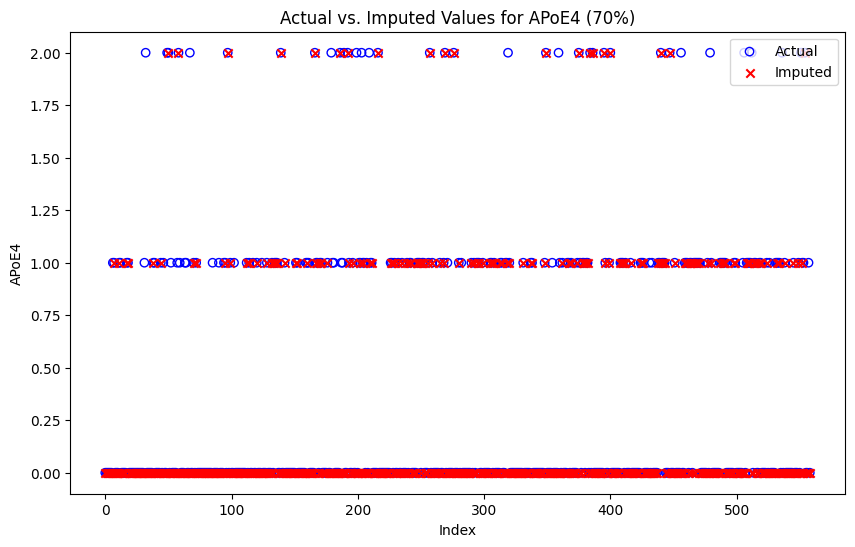

In [30]:
# Visualising the actual values and imputed values of the 'APOE' column

import matplotlib.pyplot as plt

# Extract actual and imputed values
actual_values = df_actual['APOE']
imputed_values = df_imputed_70['APOE']

# Create an array of indices from 0 to the length of the DataFrame
indices = range(len(actual_values))

# Plot the actual values and imputed values as scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(indices, actual_values, label='Actual', marker='o', facecolors='none', edgecolors='blue')
plt.scatter(indices, imputed_values, label='Imputed', marker='x', color='red')
plt.xlabel('Index')
plt.ylabel('APoE4')
plt.title('Actual vs. Imputed Values for APoE4 (70%)')  # Set y-axis limits to match the range of the actual values
plt.legend()
plt.show()


In [ ]:
# Calculating RMSE to evaluate the performance of imputation on missing values by the autoencoder.
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract actual and imputed values
actual_values = df_actual['APOE'] # contains the actual values of 'APOE'
imputed_values = df_imputed_70['APOE'] # contains the imputed values of 'APOE'

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, imputed_values))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.4395476614549539


In [ ]:
# Calculation of accuracy of the performed imputation.
# Compute the number of correctly imputed values.
correct_imputations = (df_actual['APOE'] == df_imputed_70['APOE']).sum()

# Compute the total number of imputed values
total_imputations = len(df_imputed_70['APOE'])

# Compute the accuracy of the imputation
accuracy = correct_imputations / total_imputations

print("Imputation Accuracy:", accuracy)

Imputation Accuracy: 0.8926654740608229


In [ ]:
# Get the weights of the first dense layer (connecting input to hidden layer)
weights = autoencoder.layers[1].get_weights()[0]

# Calculate the importance of each feature by taking the absolute sum of weights across all hidden units
feature_importance = np.sum(np.abs(weights), axis=1)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': df_imputed_70.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top most important features
print(feature_importance_df.head())



          Feature  Importance
217       MOTHDEM    9.681858
176      PTGENDER    9.624364
219          APOE    9.282942
24   rh.VentralDC    9.113232
10    lh.Amygdala    9.106488


In [ ]:
### Classification using Random Forest Classifier
### Balancing by SMOTE
### Evaluation using K Fold Cross Validation

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt



# Split the dataset into features (X) and target variable (y)
X = df_imputed_70.drop(columns=['AD_LABEL'])  # Features
y = df_imputed_70['AD_LABEL']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=300)

# Apply SMOTE only to the training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=50)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

# Train the classifier on the resampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.90909091 0.94318182 0.90909091 0.93181818 0.98863636 0.96590909
 0.97701149 0.96551724 0.97701149 0.97701149]
Mean CV Score: 0.9544278996865205
Std CV Score: 0.027755405980309556
Accuracy: 0.7857142857142857
Precision: 0.769859090788214
Recall: 0.7857142857142857
F1-score: 0.7675333118994034

Confusion Matrix:
[[68  2  1]
 [11 10  6]
 [ 0  4 10]]

Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.96      0.91        71
           2       0.62      0.37      0.47        27
           3       0.59      0.71      0.65        14

    accuracy                           0.79       112
   macro avg       0.69      0.68      0.67       112
weighted avg       0.77      0.79      0.77       112



In [ ]:
# The accuracy obtained is 79%. This suggests that about 79% of the test instances were correctly classified by the model.
# For class 3, representing AD:
# Precision (0.59): Among the instances predicted as AD, 59% were correctly classified as AD, while the remaining 41% were incorrectly classified as non-AD.
# Recall (0.71): Out of all actual instances of AD, the model correctly identified 71% of them as AD, while the remaining 29% were incorrectly classified as non-AD.
# F1-score (0.65): The harmonic mean of precision and recall, providing a balanced measure of the classifier's performance, is 65%.